In [174]:
import matplotlib.pyplot as plt   
import plotly.express as px
import seaborn as sns  
import pandas as pd
import os                

In [176]:
file_path = os.path.expanduser("~/Desktop/netflix_titles.csv")
netflix_titles=pd.read_csv(file_path)
netflix_titles['date_added']=pd.to_datetime(netflix_titles['date_added'].str.strip(),format='%B %d, %Y')

In [175]:


netflix_titles.shape

(7982, 15)

In [186]:
netflix_titles.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,10
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",8
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,4
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,11
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",25
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,11


In [61]:
print(netflix_titles['date_added']) #Converted to datetime: datatype: date_added

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]


In [62]:
netflix_titles.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [63]:
netflix_titles.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [97]:
netflix_titles['type'].unique() #Overall we have movie & TV Shows

array(['Movie', 'TV Show'], dtype=object)

/var/folders/js/dsv7bxwn7xj0m64nrwgkm93c0000gp/T/ipykernel_70436/1839862806.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=release_years, shade=True)


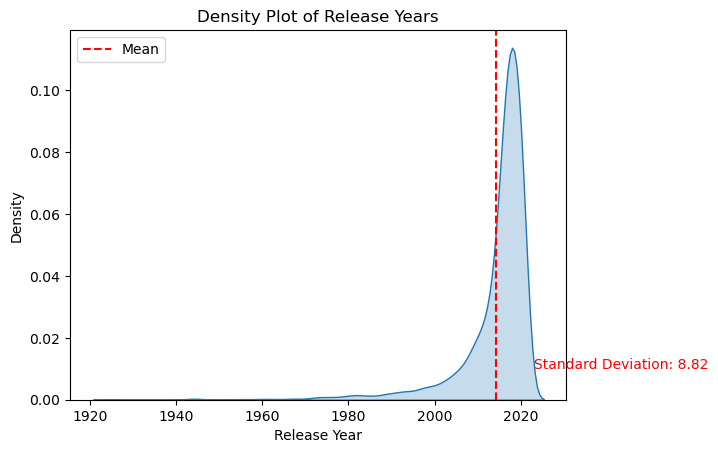

In [64]:
# Filter out missing release year values
release_years = netflix_titles['release_year'].dropna()

# Calculate the standard deviation of release years
std_dev = release_years.std()

# Create a density plot
sns.kdeplot(data=release_years, shade=True)

# Add a vertical line to represent the mean release year
plt.axvline(x=release_years.mean(), color='red', linestyle='--', label='Mean')

# Add a text annotation for the standard deviation
plt.text(release_years.mean() + std_dev, 0.01, f'Standard Deviation: {std_dev:.2f}', color='red')

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.title('Density Plot of Release Years')

# Display the plot
plt.legend()
plt.show()

In [65]:
release_year_counts = netflix_titles.groupby('release_year').size()
print(release_year_counts)



release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64


<Axes: >

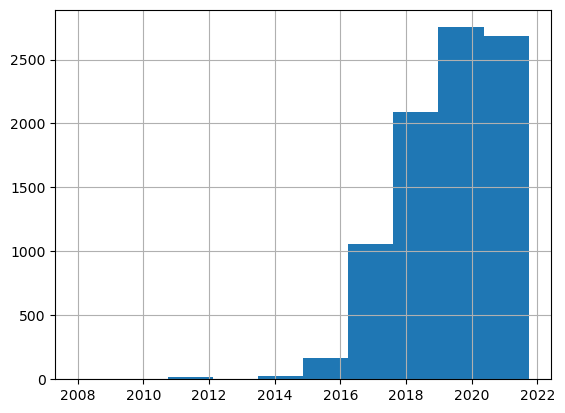

In [66]:
netflix_titles['date_added'].hist()

In [88]:
px.histogram(netflix_titles,'date_added',color='date_added')

KeyError: Timestamp('2021-09-25 00:00:00')

In [102]:
netflix_titles['date_month_added']=netflix_titles['date_added'].dt.month.fillna(0)
#print(netflix_titles['date_month_added'])

px.histogram(netflix_titles,'date_month_added',color='type') #Evenly distributed month-wise 
#so we have lot of movie shows. that makes lot of sense right!!

In [99]:
netflix_titles['date_day_added']=netflix_titles['date_added'].dt.day.fillna(0)  

#px.title("Release time of Movies & TVShows")
px.histogram(netflix_titles,'date_day_added',color='type',title='Typical release time of Movie & Shows')

#Begining of month has highest number of release of both movies and tv-shows    

In [100]:
netflix_titles.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_month_added', 'date_day_added'],
      dtype='object')

In [113]:
type_counts = netflix_titles['type'].value_counts()
color=['brown','orange']
fig = px.pie(type_counts, values=type_counts.values, names=type_counts.index, title='Netflix Content Types',color_discrete_sequence=color)
fig.show()

In [160]:
netflix_country=netflix_titles.copy()
netflix_country=pd.concat([netflix_country,netflix_titles["country"].str.split(",",expand=True)],axis=1)
netflix_country=netflix_country.melt(id_vars=["type","title"],value_vars=range(12),value_name='country')
netflix_country=netflix_country[netflix_country['country'].notna()]   # removing None values
netflix_country['country']=netflix_country["country"].str.strip()
print(netflix_country)


           type                          title variable         country
0         Movie           Dick Johnson Is Dead        0   United States
1       TV Show                  Blood & Water        0    South Africa
4       TV Show                   Kota Factory        0           India
7         Movie                        Sankofa        0   United States
8       TV Show  The Great British Baking Show        0  United Kingdom
...         ...                            ...      ...             ...
78859     Movie            The Look of Silence        8         Germany
85496     Movie                       Barbecue        9          Sweden
87666     Movie            The Look of Silence        9     Netherlands
94303     Movie                       Barbecue       10   United States
103110    Movie                       Barbecue       11         Uruguay

[10019 rows x 4 columns]


/var/folders/js/dsv7bxwn7xj0m64nrwgkm93c0000gp/T/ipykernel_70436/2156027726.py:3: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



In [164]:
px.histogram(netflix_country,"country",color='type').update_xaxes(categoryorder="total descending")

In [167]:
px.histogram(netflix_titles,"rating").update_xaxes(categoryorder="total descending") # For american rating system.

In [178]:
netflix_titles['cast count']=netflix_titles['cast'].str.split(",")

netflix_titles=netflix_titles[netflix_titles['cast count'].notna()]

netflix_titles["cast count"]=netflix_titles["cast count"].apply(lambda x:len(x))

/var/folders/js/dsv7bxwn7xj0m64nrwgkm93c0000gp/T/ipykernel_70436/3664589222.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
px.histogram(netflix_titles,"cast count").update_xaxes(categoryorder="total descending") #Cast count in a movie or TVShow. 